<a href="https://colab.research.google.com/github/hflautert/AnomalyDetection/blob/main/IOTIN_HTTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experimento de reconhecimento de anomalias em ataque DoS do tipo HTTP.

Fonte de dados: https://ieee-dataport.org/open-access/iot-network-intrusion-dataset

Hyunjae Kang, Dong Hyun Ahn, Gyung Min Lee, Jeong Do Yoo, Kyung Ho Park, Huy Kang Kim, September 27, 2019, "IoT network intrusion dataset", IEEE Dataport, doi: https://dx.doi.org/10.21227/q70p-q449.


Para gerar as estatísticas, os arquivos foram abertos com WireShark, aplicado filtro `http`. Posteriormente gerado dados no menu Statistics, I/O Graph, salvo como csv, nos intervalos de 100ms, 500ms e 1 segundo.

In [50]:
# Importando bibliotecas
# Manipulação de matrizes e operações matemáticas de alto nível
import numpy as np
# Geração de gráficos
import matplotlib.pyplot as plt
# Funcoes media movel
import httpimport
url = "https://gist.githubusercontent.com/hflautert/c0d5dee869cb369a912de6b8c02d457e/raw/5878dc67cac9ddfc26345a95b35c4f96ace6d57d"
with httpimport.remote_repo(url):
  import funcoesmm as fmm

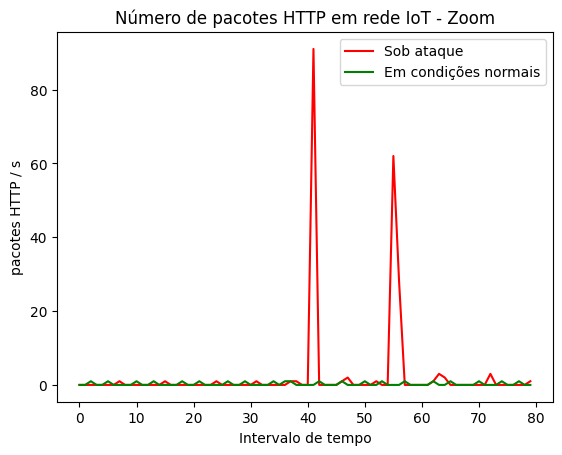

In [51]:
# Carregando dados
dados_normal_100ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_http_100ms.csv")
dados_normal_500ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_http_500ms.csv")
dados_normal_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_http_1s.csv")

dados_ataque_100ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-1-dec_100ms.csv")
dados_ataque_500ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-1-dec_500ms.csv")
dados_ataque_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-1-dec_1s.csv")

tipo_dos_pacotes='HTTP'

#fmm.visualiza(dados_normal_1s,'s','g','Rede IoT em condições normais',tipo_dos_pacotes)
#fmm.visualiza(dados_ataque_1s,'s','r','Rede IoT sob ataque',tipo_dos_pacotes)
#fmm.visualizamix(dados_ataque_1s,'r',dados_normal_1s,'g','s',tipo_dos_pacotes)

# Vizualização otimizada com zoom na janela de ataque de 1, 10 e 100 pcts/s
v_dados_normal_1s = dados_normal_1s[:80]
v_dados_ataque_1s = dados_ataque_1s[:80]

# Unindo linhas
plt.plot(v_dados_ataque_1s, color = 'r', label = "Sob ataque")
plt.plot(v_dados_normal_1s, color = 'g', label = "Em condições normais")
plt.title('Número de pacotes '+tipo_dos_pacotes+' em rede IoT - Zoom')
plt.xlabel('Intervalo de tempo')
plt.ylabel('pacotes '+tipo_dos_pacotes+' / s')
plt.legend()
plt.show()

Total de ataques identificados: 1


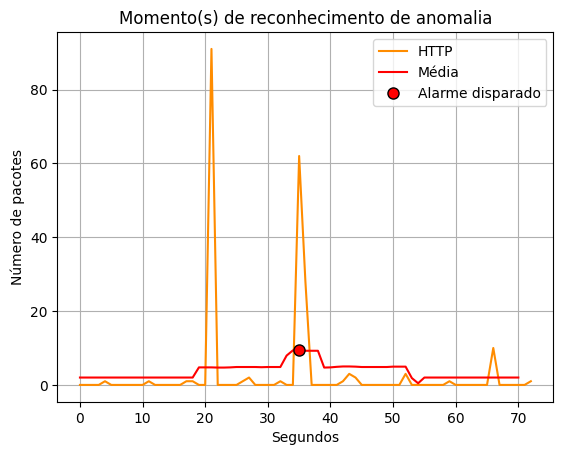

Falsos positivos: 0


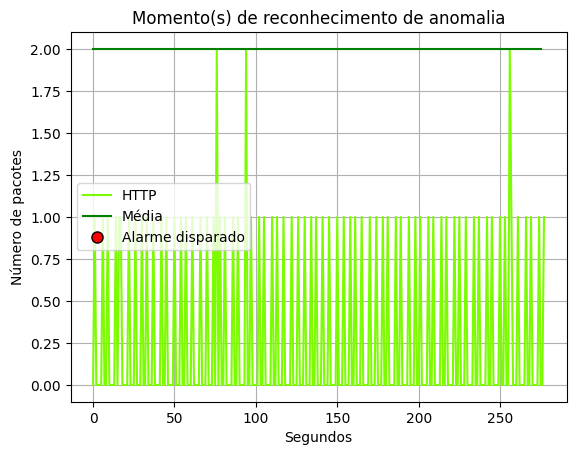

In [52]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_1s
dados_ataque=dados_ataque_1s
unidade_de_tempo='Segundos'
delta=1.10
intervalo=20
taxa_minima=2

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 1


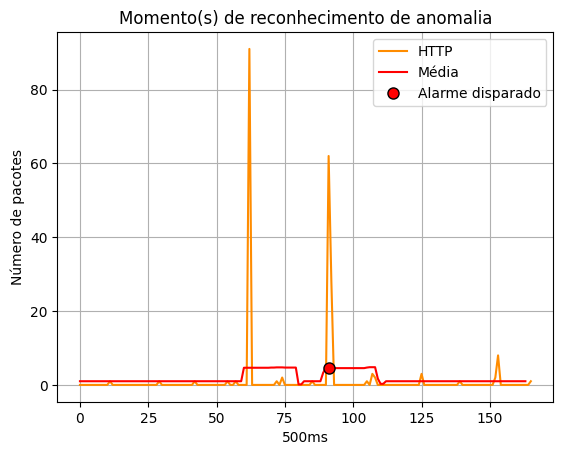

Falsos positivos: 0


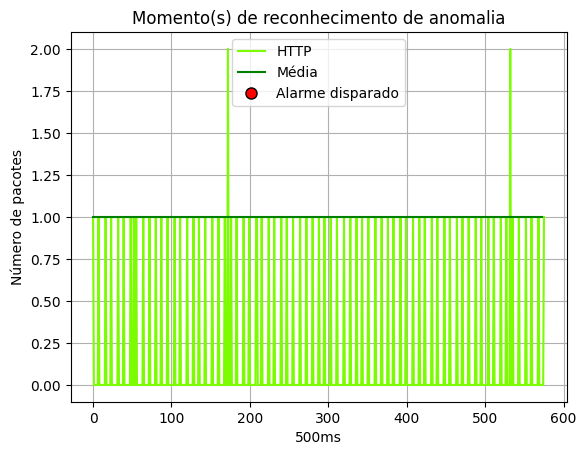

In [53]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_500ms
dados_ataque=dados_ataque_500ms
unidade_de_tempo='500ms'
delta=1.10
intervalo=20
taxa_minima=1

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)


Total de ataques identificados: 1


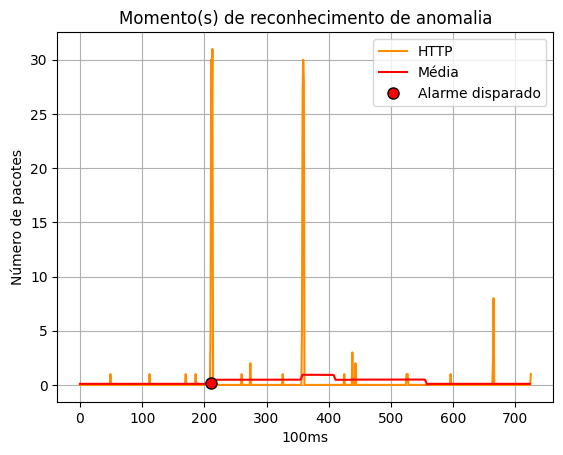

Falsos positivos: 0


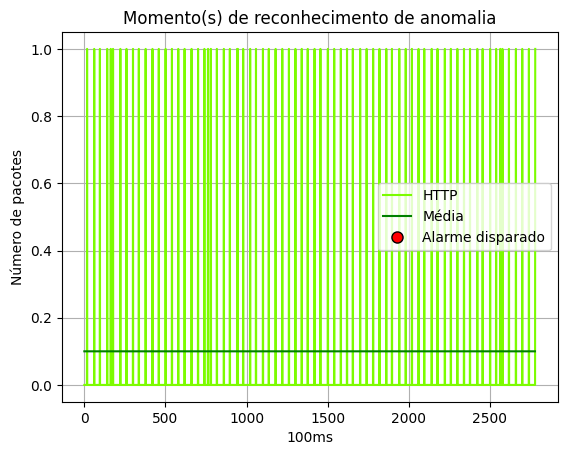

In [54]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_100ms
dados_ataque=dados_ataque_100ms
unidade_de_tempo='100ms'
delta=1.10
intervalo=200
taxa_minima=0.1

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)


Próximo arquivo:

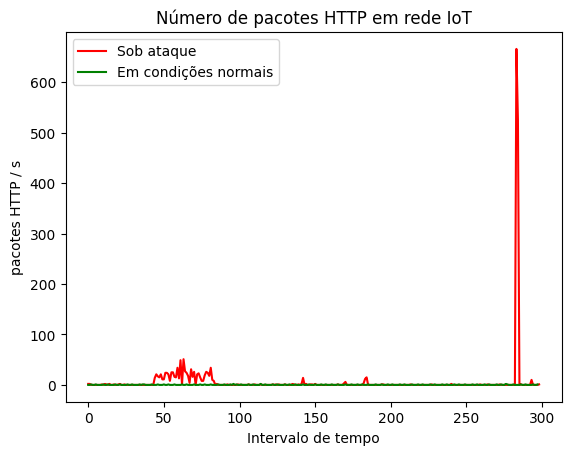

In [55]:
dados_ataque_100ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-2-dec_100ms.csv")
dados_ataque_500ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-2-dec_500ms.csv")
dados_ataque_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-2-dec_1s.csv")

fmm.visualizamix(dados_ataque_1s,'r',dados_normal_1s,'g','s',tipo_dos_pacotes)

Total de ataques identificados: 1


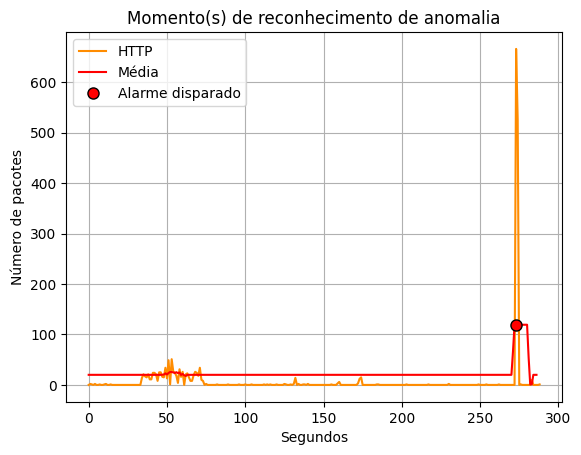

Falsos positivos: 0


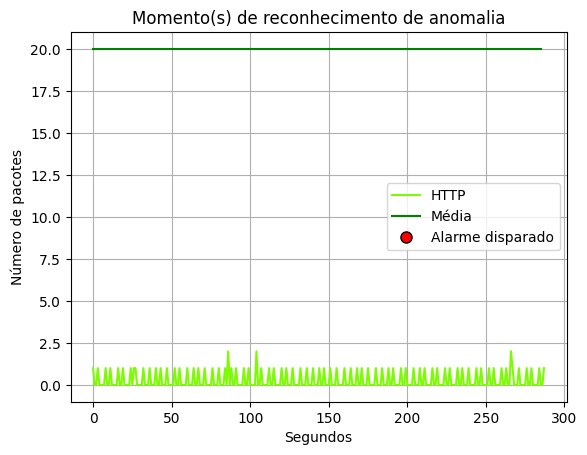

In [56]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_1s
dados_ataque=dados_ataque_1s
unidade_de_tempo='Segundos'
delta=1.10
intervalo=10
taxa_minima=20

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)


Total de ataques identificados: 1


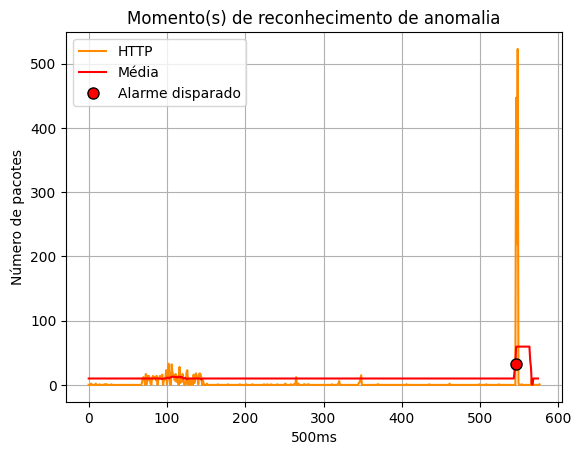

Falsos positivos: 0


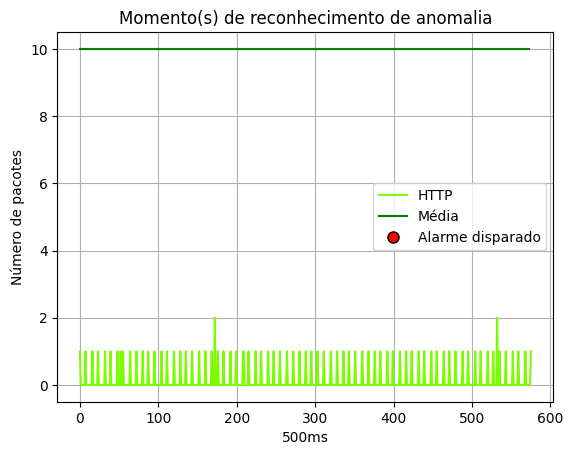

In [57]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_500ms
dados_ataque=dados_ataque_500ms
unidade_de_tempo='500ms'
delta=1.10
intervalo=20
taxa_minima=10

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)


Total de ataques identificados: 1


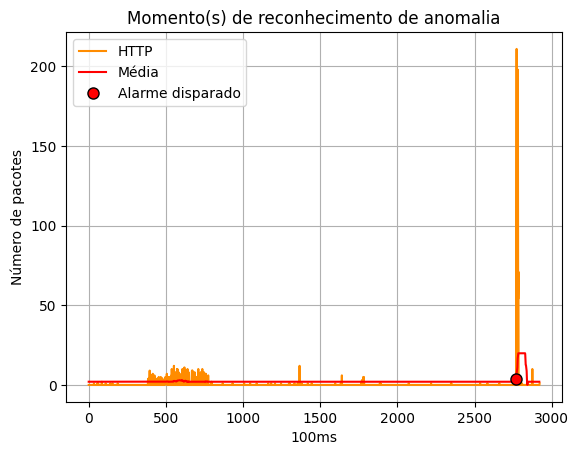

Falsos positivos: 0


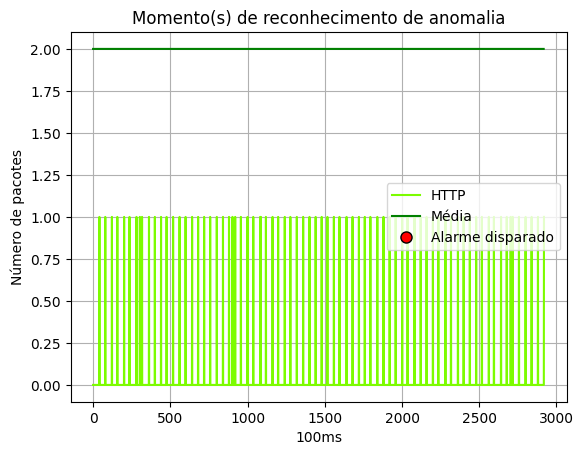

In [58]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_100ms
dados_ataque=dados_ataque_100ms
unidade_de_tempo='100ms'
delta=1.10
intervalo=60
taxa_minima=2

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)


Próximo arquivo:

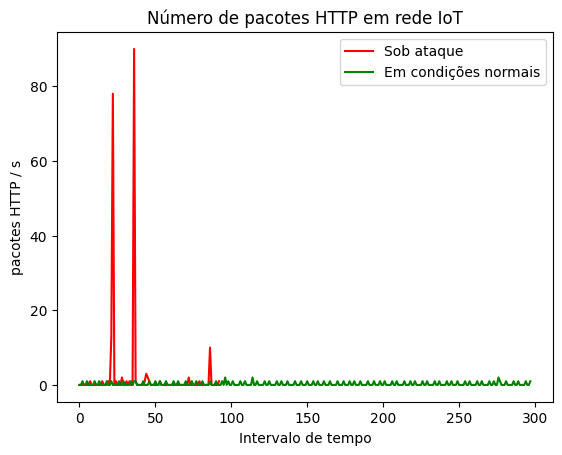

In [59]:
dados_ataque_100ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-3-dec_100ms.csv")
dados_ataque_500ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-3-dec_500ms.csv")
dados_ataque_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-3-dec_1s.csv")

fmm.visualizamix(dados_ataque_1s,'r',dados_normal_1s,'g','s',tipo_dos_pacotes)

Total de ataques identificados: 1


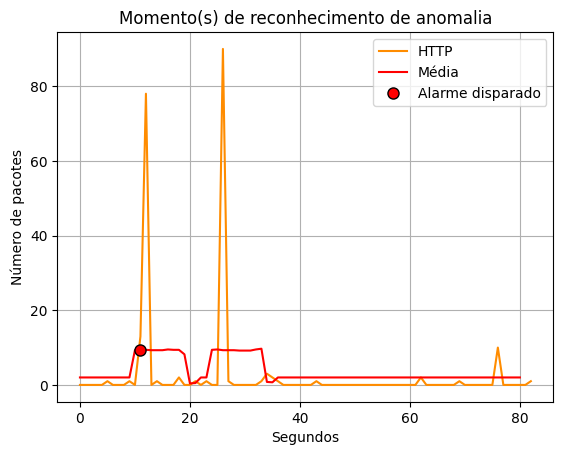

Falsos positivos: 0


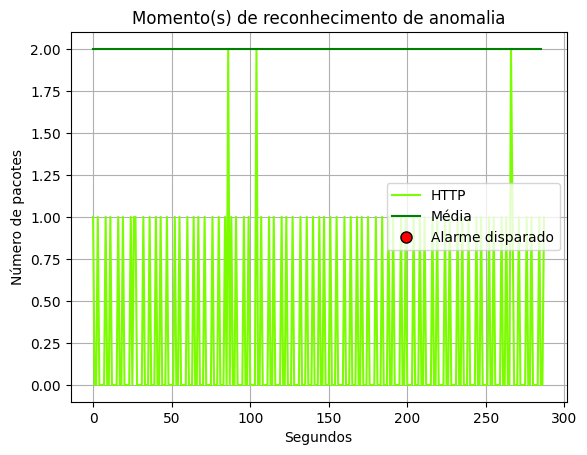

In [60]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_1s
dados_ataque=dados_ataque_1s
unidade_de_tempo='Segundos'
delta=1.10
intervalo=10
taxa_minima=2

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 1


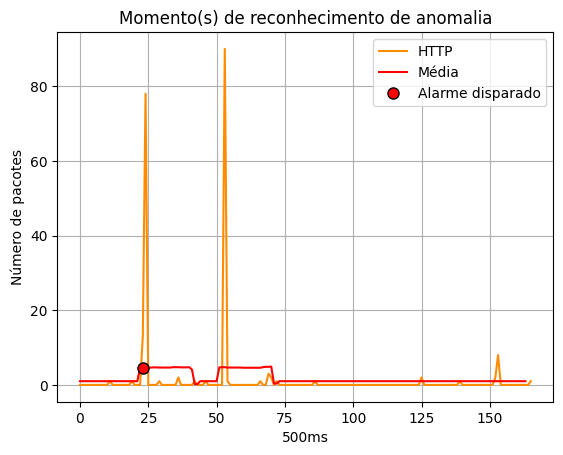

Falsos positivos: 0


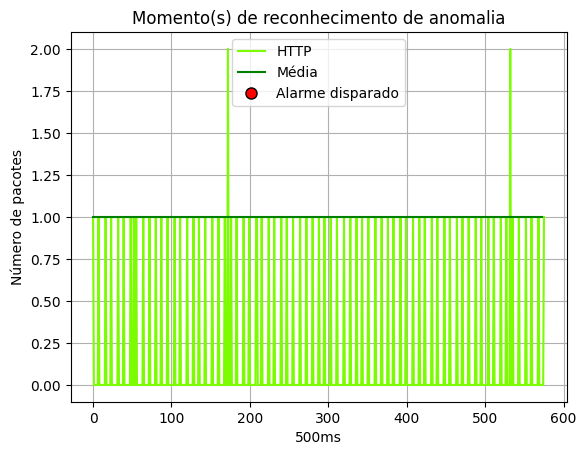

In [61]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_500ms
dados_ataque=dados_ataque_500ms
unidade_de_tempo='500ms'
delta=1.10
intervalo=20
taxa_minima=1

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 1


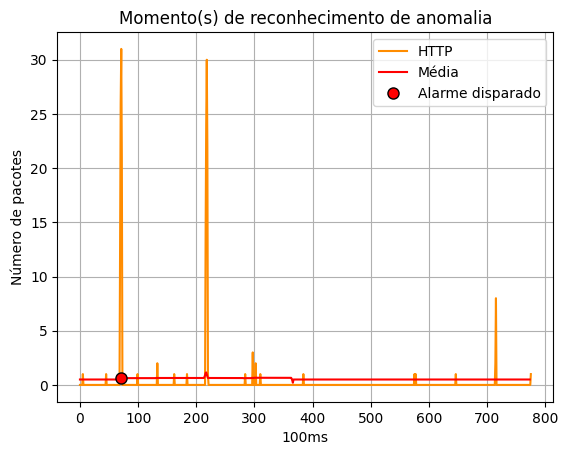

Falsos positivos: 0


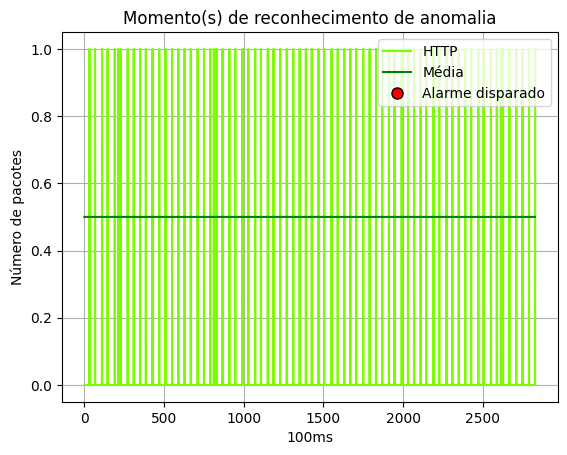

In [62]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_100ms
dados_ataque=dados_ataque_100ms
unidade_de_tempo='100ms'
delta=1.10
intervalo=150
taxa_minima=0.5

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Próximo arquivo:

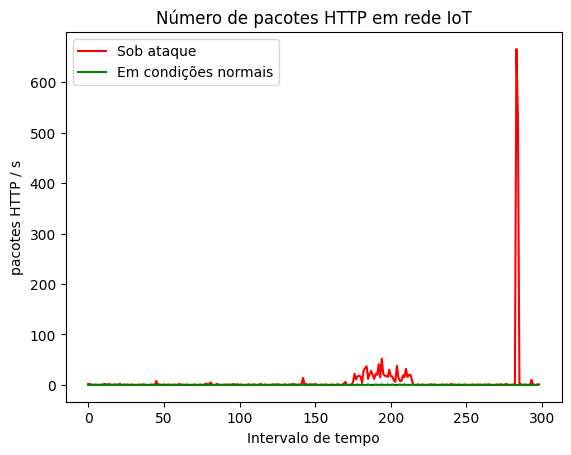

In [63]:
dados_ataque_100ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-4-dec_100ms.csv")
dados_ataque_500ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-4-dec_500ms.csv")
dados_ataque_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/mirai-httpflooding-4-dec_1s.csv")

fmm.visualizamix(dados_ataque_1s,'r',dados_normal_1s,'g','s',tipo_dos_pacotes)

Total de ataques identificados: 1


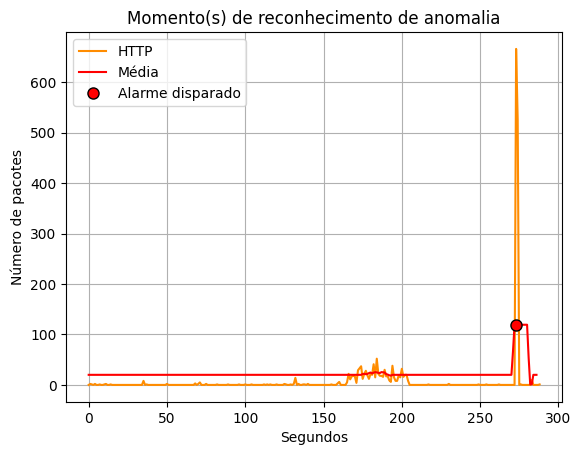

Falsos positivos: 0


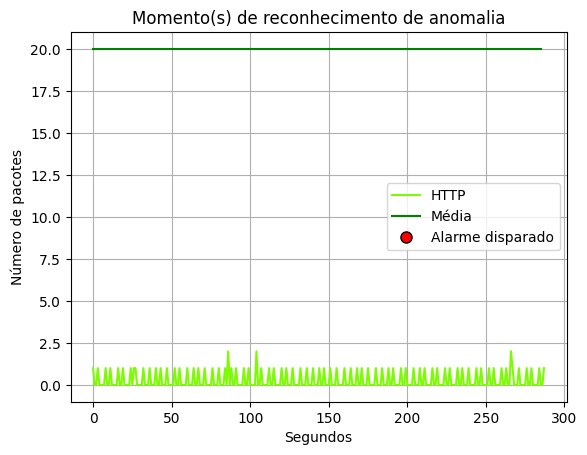

In [64]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_1s
dados_ataque=dados_ataque_1s
unidade_de_tempo='Segundos'
delta=1.10
intervalo=10
taxa_minima=20

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 1


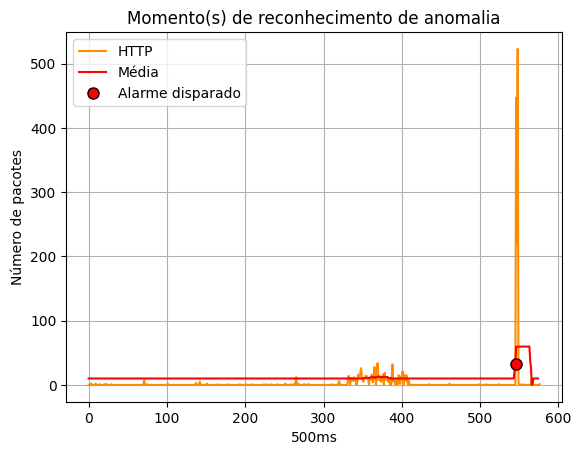

Falsos positivos: 0


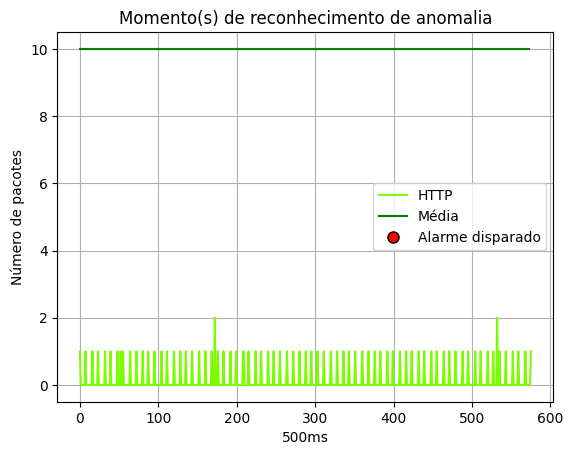

In [65]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_500ms
dados_ataque=dados_ataque_500ms
unidade_de_tempo='500ms'
delta=1.10
intervalo=20
taxa_minima=10

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)

Total de ataques identificados: 1


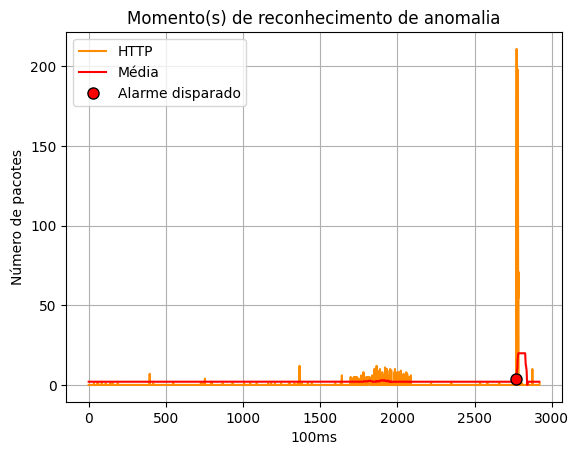

Falsos positivos: 0


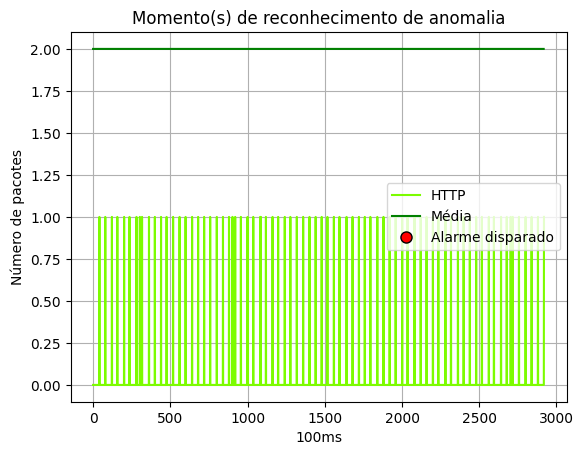

In [66]:
# Para reaproveitamento das chamadas
dados_normal=dados_normal_100ms
dados_ataque=dados_ataque_100ms
unidade_de_tempo='100ms'
delta=1.10
intervalo=60
taxa_minima=2

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)